In [349]:
import numpy as np
import pandas as pd

In [350]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [351]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc

In [352]:
def get_mae(model):
    train_pred = model.predict(X_train)
    score = mean_absolute_error(y_train,train_pred)
    print(model.__class__.__name__, " train MAE: ", np.round(score,3))
    pred = model.predict(X_test)
    score = mean_absolute_error(y_test,pred)
    print(model.__class__.__name__, " MAE: ", np.round(score,3))

In [353]:
def get_maes(models):
    scores = []
    for model in models:
        score = get_mae(model)
        # scores.append(score)
    # return scores

In [354]:

def get_r2score(model):
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    train_score = r2_score(y_train,train_pred)
    score = r2_score(y_test,pred)
    print(model.__class__.__name__, " train_R2SCORE: ", np.round(train_score,3))
    print(model.__class__.__name__, " R2SCORE: ", np.round(score,3))

In [355]:
def get_rmse(model):
    train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train,train_pred)
    rmse = np.sqrt(train_mse)
    print(model.__class__.__name__, 'train RMSE: ', np.round(rmse,3))
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' RMSE: ', np.round(rmse,3))
    return rmse

In [356]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        # rmses.append(rmse)
    # return rmses

In [357]:
def get_r2scores(models):
    scores = []
    for model in models:
        score = get_r2score(model)
        # scores.append(score)
    # return scores

In [358]:
# Preprocessing for turn over rate
def tor_preprocessing(tor):
  tor_df = tor
  tor_val = tor_df['turn_over_rate']

  for i, val in enumerate(tor_val):
    if '정보' in val:
      tor_df.loc[i,'turn_over_rate'] = np.NAN
    elif val == '(9999%)' :
      tor_df.loc[i,'turn_over_rate'] = np.NAN
    elif '(' in val:
      tmp = float(val[1:-1].replace('%',''))*0.01
      tor_df.loc[i,'turn_over_rate'] = tmp

  return tor_df

In [359]:
# Preprocessing for financial variable
def fv_preprocessing(fv):
  fv_df = fv
  afv = fv_df['average_salary']
  tfv = fv_df['total_sale']

  for i, val in enumerate(afv):
    if type(val) == str:
        if '만원' in val:
          tmp = int(val[:-2].replace(',',''))
          fv_df.loc[i,'average_salary'] = tmp
        if '회사' in val:
          fv_df.loc[i,'average_salary'] = np.NAN
        if '수집' in val:
          fv_df.loc[i,'average_salary'] = np.NAN

  for i, val in enumerate(tfv):
    if type(val) == str:
        if '조원' in val:
          tmp = float(val[:-2].replace(',',''))*1000
          fv_df.loc[i,'total_sale'] = tmp
        if '억원' in val:
          tmp = float(val[:-2].replace(',',''))
          fv_df.loc[i,'total_sale'] = tmp
        if '억' in val:
          tmp = float(val[:-1].replace(',',''))
          fv_df.loc[i,'total_sale'] = tmp
          print(fv_df.loc[i,'total_sale'])
          print(i)
        if '회사' in val:
          fv_df.loc[i,'total_sale'] = np.NAN

  return fv_df

In [360]:
combined_data = pd.read_csv("new_bow_df.csv")


In [361]:

from sklearn.model_selection import train_test_split
combined_data = combined_data[combined_data['turn_over_rate']<1]
error_firm = ['동원홈푸드','휠라홀딩스','트리','와디즈','키위컴퍼니','줌인터넷','시선인터내셔널','브이티코스메틱','유니슨이테크','씨엠비대전방송','서울비젼','더메인즈','조은시스템']
for i in error_firm:
    combined_data = combined_data[combined_data.company_name != i]
combined_data.dropna(axis=0, inplace=True)
combined_data = combined_data.drop(['Unnamed: 0'], axis=1)
combined_data = fv_preprocessing(combined_data)
tor = combined_data['turn_over_rate']
combined_data.drop('turn_over_rate', axis=1, inplace=True)


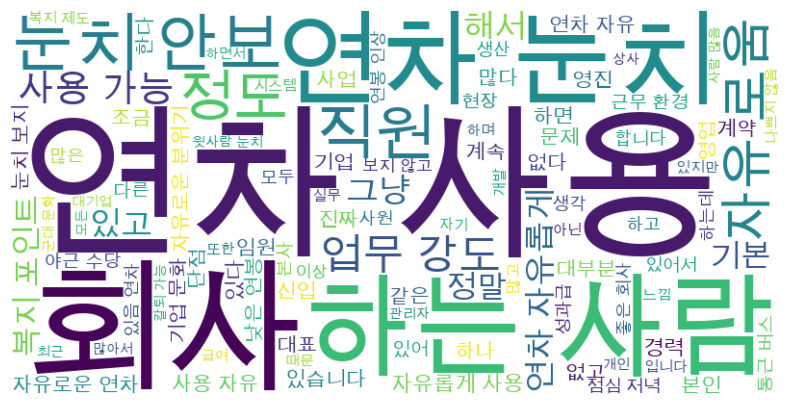

In [362]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
# font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_path = "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
# MAC
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False


# 'adv'와 'dadv' 컬럼의 텍스트를 합치기
combined_text = " ".join(combined_data['adv'] + " " + combined_data['dadv'])

# 워드 클라우드 생성
# wordcloud = WordCloud(font_path=font_path, width=800, height=400, max_words=100, background_color='white').generate(combined_text)
wordcloud = WordCloud(font_path=font_path, width=800, height=400, max_words=100, background_color='white').generate(combined_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [363]:
combined_data = combined_data.drop(['company_name'], axis = 1, inplace = False)

In [364]:
train_input, test_input, train_target, test_target = train_test_split(combined_data, tor, test_size=0.2)

In [365]:
train_input['adv_dadv_combined'] = train_input['adv'] + ' ' + train_input['dadv']
test_input['adv_dadv_combined'] = test_input['adv'] + ' ' + test_input['dadv']

In [366]:
train_text = train_input['adv_dadv_combined'].to_numpy()

In [367]:
test_text = test_input['adv_dadv_combined'].to_numpy()

In [368]:
financial_train1=train_input['average_salary'].to_numpy()
financial_train2=train_input['total_sale'].to_numpy()
financial_test1=test_input['average_salary'].to_numpy()
financial_test2=test_input['total_sale'].to_numpy()

In [369]:
# np.array2string(train_adv_text)
# np.array2string(train_dadv_text)
# np.array2string(test_adv_text)
# np.array2string(test_dadv_text)

In [370]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvector = TfidfVectorizer(max_features=2000)
text_train = tfidfvector.fit_transform(train_text)
text_test = tfidfvector.transform(test_text)

In [371]:
financial_train1 = financial_train1.reshape(-1, 1)
financial_train2 = financial_train2.reshape(-1, 1)
financial_test1 = financial_test1.reshape(-1, 1)
financial_test2 = financial_test2.reshape(-1, 1)

In [372]:
financial_train1 = financial_train1.astype(float)
financial_train2 = financial_train2.astype(float)
financial_test1 = financial_test1.astype(float)
financial_test2 = financial_test2.astype(float)

In [373]:
from scipy.sparse import hstack # tf-idf로 변환된 텍스트 데이터와 금융 데이터를 연결
X_train = hstack([text_train, financial_train1, financial_train2])  # 텍스트 데이터와 금융 데이터를 수평으로 연결
X_test = hstack([text_test, financial_test1, financial_test2])    # 테스트 데이터에 대해서도 동일하게 수행

In [374]:
y_train = train_target.to_numpy()
y_test = test_target.to_numpy()

In [375]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
print('\n')
get_r2scores(models)
print('\n')
get_maes(models)

LinearRegression train RMSE:  0.084
LinearRegression  RMSE:  0.182
Ridge train RMSE:  0.113
Ridge  RMSE:  0.166
Lasso train RMSE:  0.174
Lasso  RMSE:  0.181


LinearRegression  train_R2SCORE:  0.811
LinearRegression  R2SCORE:  0.14
Ridge  train_R2SCORE:  0.661
Ridge  R2SCORE:  0.288
Lasso  train_R2SCORE:  0.191
Lasso  R2SCORE:  0.156


LinearRegression  train MAE:  0.066
LinearRegression  MAE:  0.135
Ridge  train MAE:  0.084
Ridge  MAE:  0.119
Lasso  train MAE:  0.134
Lasso  MAE:  0.138


In [376]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):

    grid_model = GridSearchCV(model, param_grid=params, verbose=3,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train.astype(float),y_train.astype(float))
    mse = -1 * grid_model.best_score_
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('train: {0} After 5 CV, best average MSE: {1}, best average RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))

    grid_score = grid_model.score(X_test.astype(float), y_test.astype(float))
    mse = -1 * grid_score
    rmse = np.sqrt(-1*grid_score)
    print('test: {0}  MSE: {1}, RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))
    return grid_model
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
ridge_reg = print_best_params(ridge_reg,ridge_params)
lasso_reg = print_best_params(lasso_reg,lasso_params)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......................alpha=0.05;, score=-0.044 total time=   0.1s
[CV 2/5] END .......................alpha=0.05;, score=-0.038 total time=   0.2s
[CV 3/5] END .......................alpha=0.05;, score=-0.037 total time=   0.1s
[CV 4/5] END .......................alpha=0.05;, score=-0.038 total time=   0.2s
[CV 5/5] END .......................alpha=0.05;, score=-0.043 total time=   0.1s
[CV 1/5] END ........................alpha=0.1;, score=-0.038 total time=   0.1s
[CV 2/5] END ........................alpha=0.1;, score=-0.032 total time=   0.1s
[CV 3/5] END ........................alpha=0.1;, score=-0.031 total time=   0.1s
[CV 4/5] END ........................alpha=0.1;, score=-0.031 total time=   0.1s
[CV 5/5] END ........................alpha=0.1;, score=-0.036 total time=   0.1s
[CV 1/5] END ..........................alpha=1;, score=-0.030 total time=   0.0s
[CV 2/5] END ..........................alpha=1;, 

In [377]:
from sklearn.metrics import mean_absolute_error
def get_MAE_RMSE(model):
  # 모델을 사용하여 예측값 생성
  y_pred = model.predict(X_test)

  # MAE 계산
  mae = mean_absolute_error(y_test, y_pred)
  print(f"MAE: {mae:.4f}")
  # rmse
  grid_score = model.score(X_test, y_test)
  mse = -1 * grid_score
  rmse = np.sqrt(-1*grid_score)
  print('test: {0}  MSE: {1}, RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                            np.round(rmse,4),ridge_reg.best_params_))

In [378]:
import matplotlib.pyplot as plt

In [379]:
def print_coeficient_graph(model):
  # 최적 모델 추출
  best_model = model.best_estimator_

  # 최적 모델의 단어 중요도 추출
  importances = best_model.coef_

  # 중요도가 높은 순으로 정렬
  sorted_indices = importances.argsort()[::-1]

  # 상위 N개의 단어와 가중치 출력
  top_n = 12
  for index in sorted_indices[:top_n]:
      word = tfidfvector.get_feature_names_out()[index]
      importance = importances[index]
      print(f"단어: {word}, 가중치: {importance:.4f}")

  # plt.rc('font', family='NanumBarunGothic')
  plt.rc('font', family='AppleGothic')

  # 중요도가 높은 순으로 정렬된 인덱스 추출
  top_n = 12
  top_indices = sorted_indices[:top_n]

  # 상위 N개 단어와 가중치 추출
  top_words = [tfidfvector.get_feature_names_out()[index] for index in top_indices]
  top_importances = [importances[index] for index in top_indices]

  # 그래프 그리기
  plt.figure(figsize=(12, 6))
  plt.barh(top_words, top_importances, color='skyblue')
  plt.xlabel('가중치')
  plt.title('상위 12개 단어의 가중치')
  plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 순서 뒤집기
  plt.show()

In [380]:
get_MAE_RMSE(ridge_reg)

MAE: 0.1187
test: GridSearchCV  MSE: 0.0276, RMSE: 0.166, best alpha: {'alpha': 1}


단어: 없고, 가중치: 0.3069
단어: 스타트업, 가중치: 0.2668
단어: 개월, 가중치: 0.2394
단어: 대표, 가중치: 0.2259
단어: 공사, 가중치: 0.2163
단어: 인턴, 가중치: 0.2057
단어: 병원, 가중치: 0.2034
단어: 인원, 가중치: 0.1893
단어: 화장실, 가중치: 0.1870
단어: 자주, 가중치: 0.1814
단어: 퇴사, 가중치: 0.1795
단어: 매장, 가중치: 0.1773


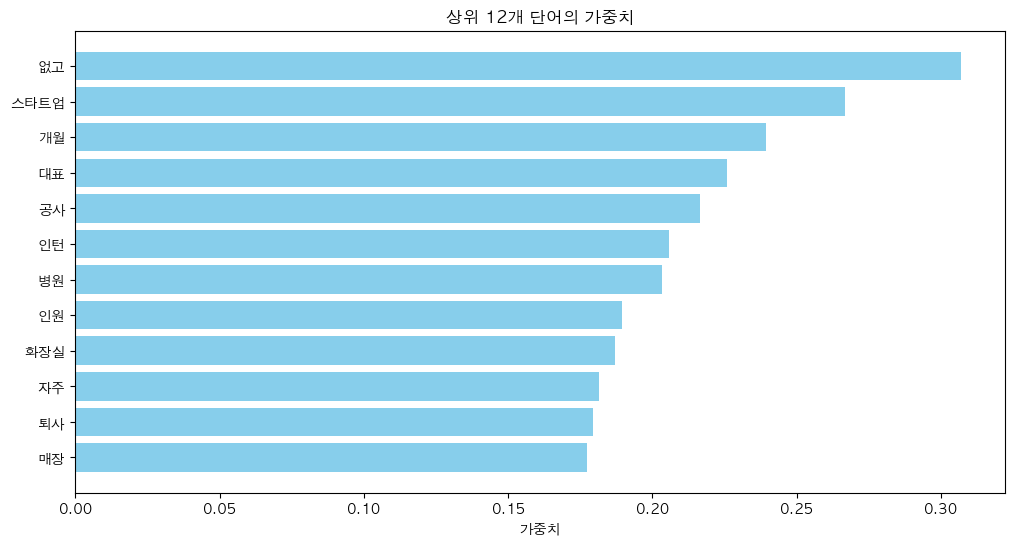

In [381]:
print_coeficient_graph(ridge_reg)


In [382]:
get_MAE_RMSE(lasso_reg)

MAE: 0.1343
test: GridSearchCV  MSE: 0.0314, RMSE: 0.1771, best alpha: {'alpha': 1}


단어: 대표, 가중치: 0.2105
단어: 싶다면, 가중치: 0.0000
단어: 밥값, 가중치: -0.0000
단어: 받기, 가중치: 0.0000
단어: 받는, 가중치: -0.0000
단어: 받는다, 가중치: -0.0000
단어: 받아, 가중치: 0.0000
단어: 받으면, 가중치: -0.0000
단어: 받은, 가중치: 0.0000
단어: 받을, 가중치: 0.0000
단어: 받음, 가중치: -0.0000
단어: 받지, 가중치: 0.0000


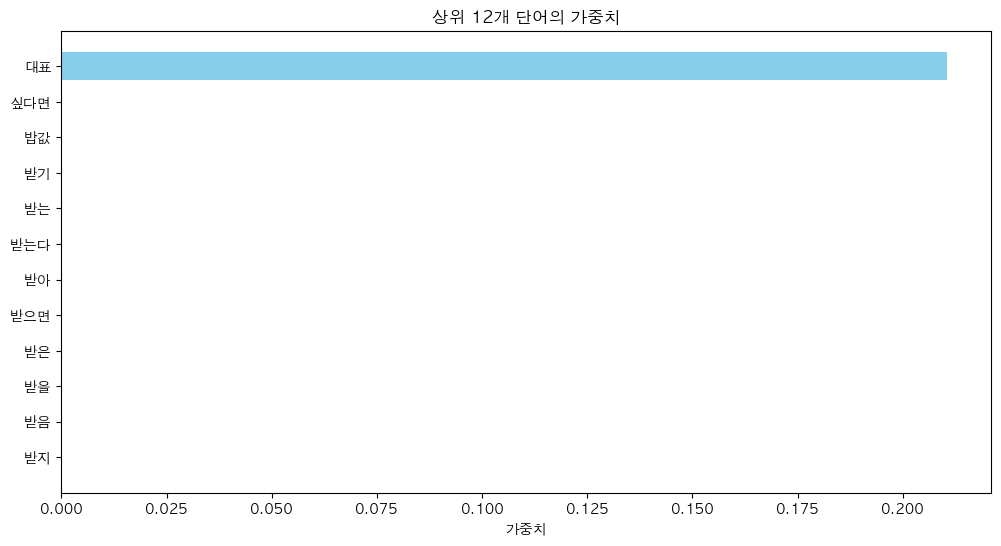

In [383]:
print_coeficient_graph(lasso_reg)

In [384]:
import joblib

joblib.dump(ridge_reg.best_estimator_, 'ridge_reg_model.pkl')
joblib.dump(lasso_reg.best_estimator_, 'lasso_reg_model.pkl')

['lasso_reg_model.pkl']

In [385]:
from xgboost import XGBRegressor

# xgb_params = {'n_estimators': [500, 750, 1000], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'max_depth' : [4,6,8,10], 'gpu_id':[0], 'tree_method' : ['gpu_hist'], 'predictor':['gpu_predictor']}
xgb_params = {'n_estimators': [500, 750, 1000], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'max_depth' : [4,6,8,10]}
xgb_reg = XGBRegressor()
print_best_params(xgb_reg, xgb_params)
xgb_reg.fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=500;, score=-0.028 total time=  14.7s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=500;, score=-0.024 total time=  12.4s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=500;, score=-0.022 total time=  16.0s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=500;, score=-0.021 total time=  15.6s


KeyboardInterrupt: 

In [ ]:
get_MAE_RMSE(xgb_reg)

In [ ]:
print_coeficient_graph(xgb_reg)

In [ ]:
joblib.dump(xgb_reg, 'xgb_reg_model.pkl')
xgb_reg_model = joblib.load('ridge_reg_model.pkl')

In [ ]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators': [500]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate= 0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

print_best_params(lgbm_reg,lgbm_params)


lgbm_reg.fit(X_train,y_train)

In [ ]:
get_MAE_RMSE(lgbm_reg)

In [ ]:
print_coeficient_graph(lgbm_reg)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {'n_estimators': [500]}
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate= 0.05, subsample=0.6 )
print_best_params(gb_reg,gb_params)

gb_reg.fit(X_train,y_train)

In [ ]:
get_MAE_RMSE(gb_reg)

In [ ]:
print_coeficient_graph(gb_reg)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {'n_estimators': [1000]}
rf_reg = RandomForestRegressor(n_estimators=1000)
print_best_params(rf_reg,rf_params)

rf_reg.fit(X_train,y_train)

In [ ]:
get_MAE_RMSE(rf_reg)

In [ ]:
print_coeficient_graph(rf_reg)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {}
dt_reg = DecisionTreeRegressor(max_depth=4)
print_best_params(dt_reg, dt_params)

dt_reg.fit(X_train,y_train)
get_mae(dt_reg)
print(dt_reg.score(X_train,y_train))
print(dt_reg.score(X_test,y_test))

In [ ]:
get_MAE_RMSE(dt_reg)

In [ ]:
print_coeficient_graph(dt_reg)